## -->Loading the CSV file containing the data

In [162]:
import pandas as pd
data=pd.read_csv('synthetic_customer_churn_data.csv')
display(data)

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn
0,1,47.0,Male,One year,96.618202,2175.896516,No,Fiber optic,22,Yes,Bank transfer,No
1,2,37.0,Male,Two year,102.508370,1801.732085,No,No,17,No,Credit card,No
2,3,49.0,Female,Month-to-month,48.170385,1633.983785,No,Fiber optic,33,No,Bank transfer,No
3,4,62.0,Female,One year,61.005917,2930.100644,No,DSL,47,No,Bank transfer,No
4,5,36.0,Male,Two year,123.713905,1820.115165,No,DSL,15,No,Mailed check,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,39.0,Female,Month-to-month,76.280062,3637.208963,No,Fiber optic,47,Yes,Credit card,No
4996,4997,50.0,Male,Month-to-month,117.356917,5366.678096,No,DSL,46,Yes,Credit card,No
4997,4998,86.0,Male,Two year,94.721854,2831.680911,Yes,No,30,Yes,Credit card,No
4998,4999,52.0,Male,One year,92.637472,1850.294351,Yes,DSL,20,Yes,Mailed check,No


## -->Data Preprocessing

**-->Handling NULL values**

In [163]:
data.isnull().sum()

CustomerID           0
Age                 50
Gender               0
ContractType         0
MonthlyCharges       0
TotalCharges        58
TechSupport          0
InternetService      0
Tenure               0
PaperlessBilling     0
PaymentMethod        0
Churn                0
dtype: int64

In [164]:
import numpy as np
data['Age']=data['Age'].fillna(np.mean(data['Age']))

In [165]:
data['TotalCharges']=data['TotalCharges'].fillna(np.mean(data['TotalCharges']))

In [166]:
data.isnull().sum()

CustomerID          0
Age                 0
Gender              0
ContractType        0
MonthlyCharges      0
TotalCharges        0
TechSupport         0
InternetService     0
Tenure              0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

## -->Exploratory Data Analysis (EDA)

**-->Univariate Analysis**

In [167]:
data.describe()

,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,40.219192,70.747440,2594.667466,36.70880
std,1443.520003,13.746244,28.586431,1889.111926,20.70637
min,1.000000,18.000000,20.000000,-46.615700,1.00000
25%,1250.750000,30.000000,49.914760,1083.401782,19.00000
50%,2500.500000,40.000000,69.927557,2232.276345,37.00000
75%,3750.250000,49.000000,89.981402,3710.111317,55.00000
max,5000.000000,98.000000,156.408546,10834.548323,72.00000


In [168]:
data['Age'].describe()

count    5000.000000
mean       40.219192
std        13.746244
min        18.000000
25%        30.000000
50%        40.000000
75%        49.000000
max        98.000000
Name: Age, dtype: float64

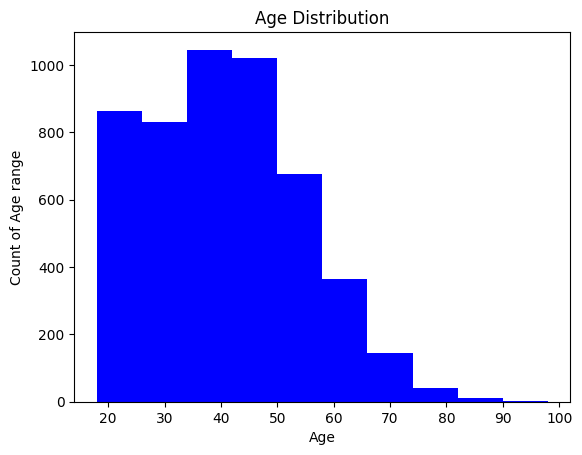

In [169]:
import matplotlib.pyplot as plt
plt.hist(data['Age'],color='blue')
plt.xlabel('Age')
plt.ylabel('Count of Age range')
plt.title('Age Distribution')
plt.show()

[]

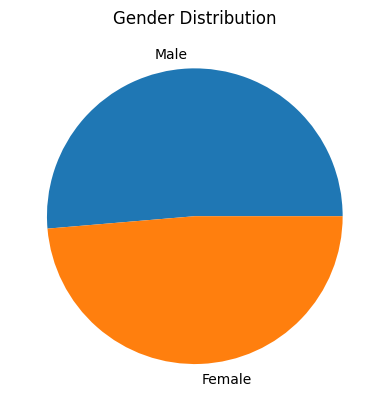

In [170]:
gender_counts = data['Gender'].value_counts()
labels=gender_counts.index
plt.pie(gender_counts.values, labels=labels)
plt.title('Gender Distribution')
plt.plot()

In [171]:
data['Tenure'].describe()

count    5000.00000
mean       36.70880
std        20.70637
min         1.00000
25%        19.00000
50%        37.00000
75%        55.00000
max        72.00000
Name: Tenure, dtype: float64

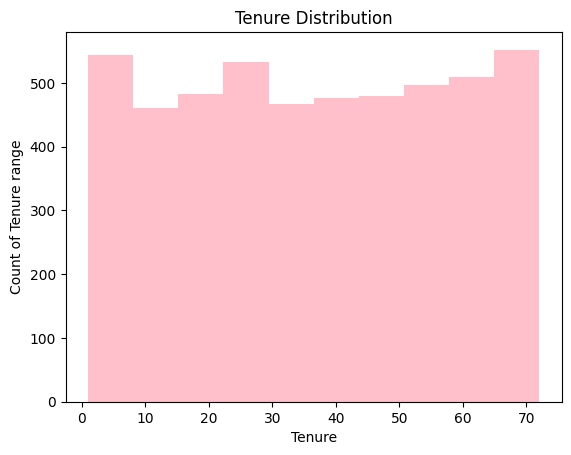

In [172]:
plt.hist(data['Tenure'],color='pink')
plt.xlabel('Tenure')
plt.ylabel('Count of Tenure range')
plt.title('Tenure Distribution')
plt.show()

In [173]:
data['TotalCharges'].describe()

count     5000.000000
mean      2594.667466
std       1889.111926
min        -46.615700
25%       1083.401782
50%       2232.276345
75%       3710.111317
max      10834.548323
Name: TotalCharges, dtype: float64

**-->Outlier detection**

[]

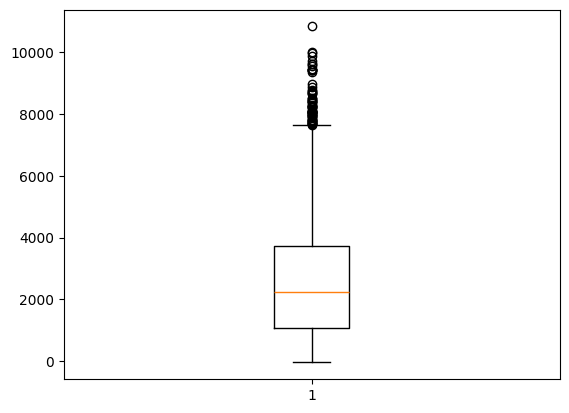

In [174]:
plt.boxplot(data['TotalCharges'])
plt.plot()

## -->Bivariate Analysis

In [175]:
cor=data['Tenure'].corr(data['TotalCharges'])
print('Correlation between Tenure and TotalCharges:',cor)

Correlation between Tenure and TotalCharges: 0.7705795389093104


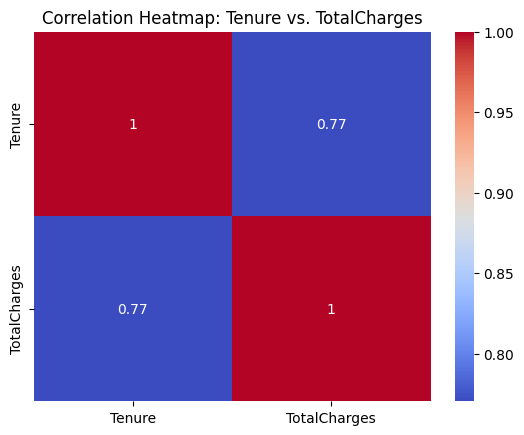

In [176]:
import seaborn as sns
correlation_matrix = data[['Tenure', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Tenure vs. TotalCharges')
plt.show()

[]

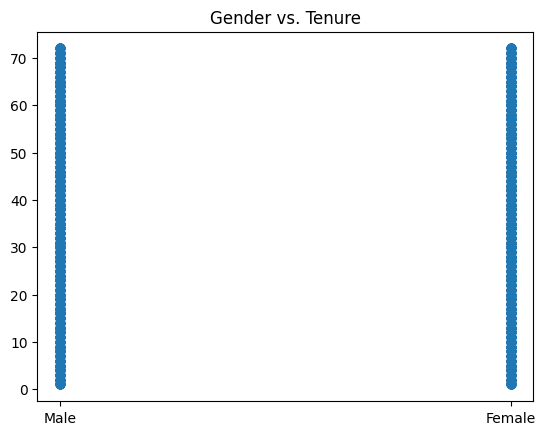

In [177]:
plt.scatter(data['Gender'],data['Tenure'])
plt.title('Gender vs. Tenure')
plt.plot()

**-->Multivariate Analysis**

[]

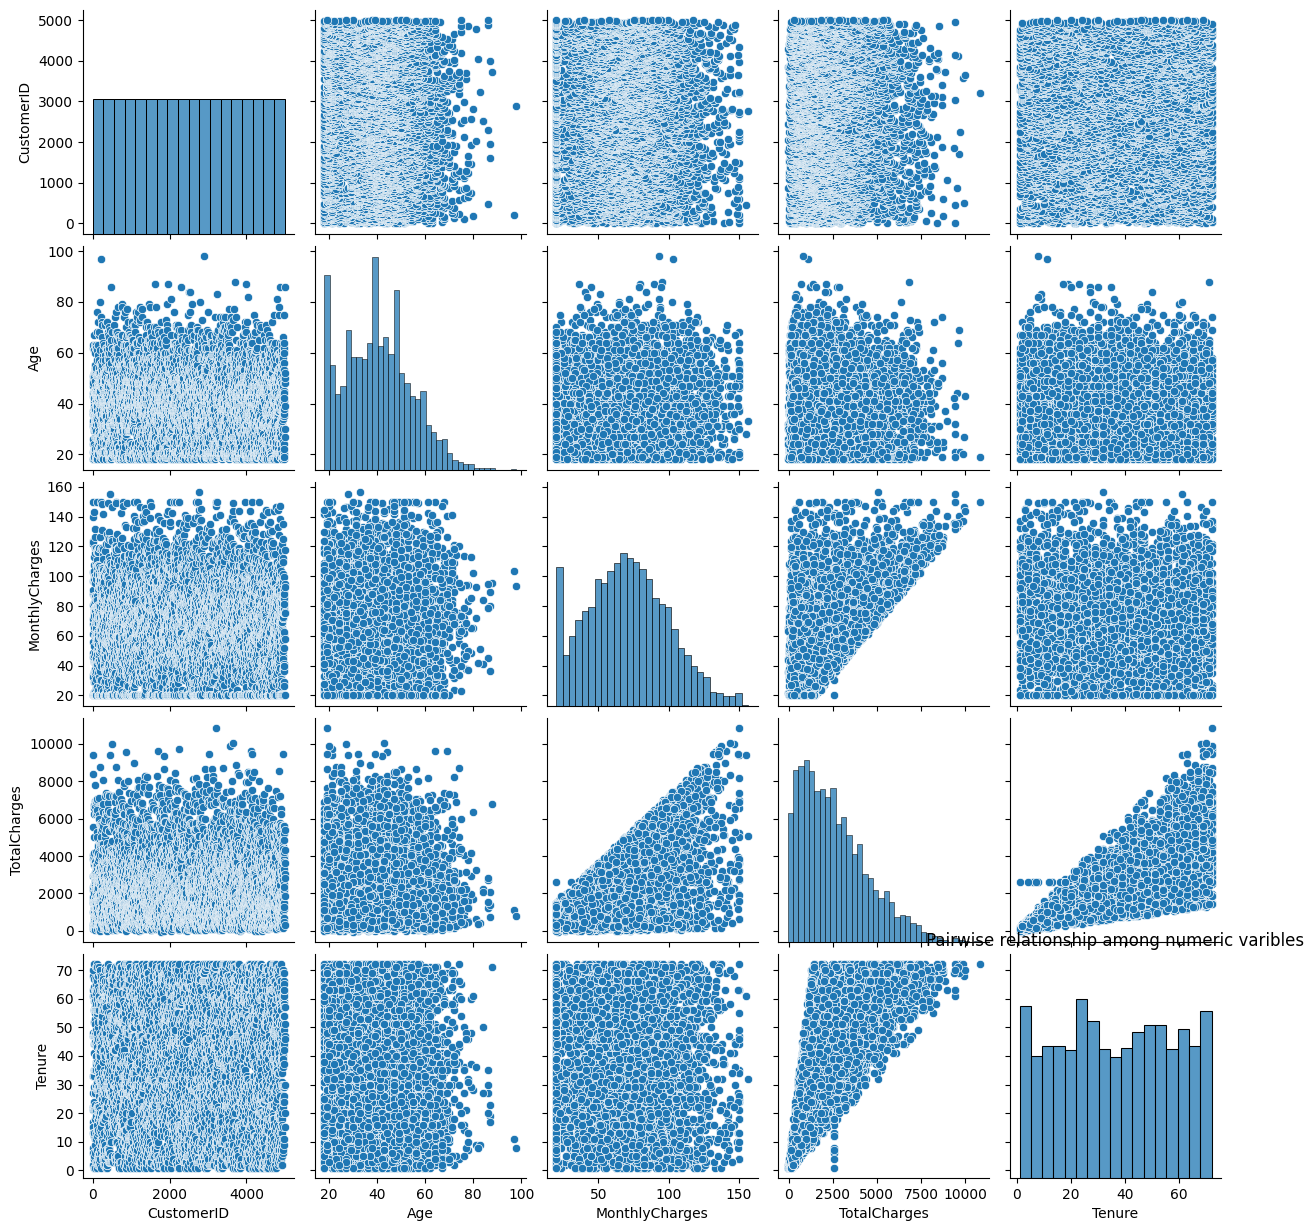

In [178]:
sns.pairplot(data)
plt.title('Pairwise relationship among numeric varibles')
plt.plot()

In [179]:
data['PaymentMethod'].value_counts()

PaymentMethod
Credit card         1285
Electronic check    1264
Mailed check        1233
Bank transfer       1218
Name: count, dtype: int64

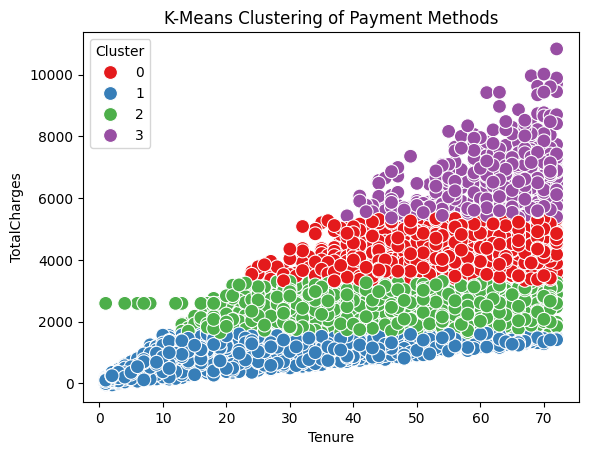

In [180]:
from sklearn.cluster import KMeans
X = data[['Tenure', 'TotalCharges']]
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=data, x=data['Tenure'], y=data['TotalCharges'], hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-Means Clustering of Payment Methods')
plt.xlabel('Tenure')
plt.ylabel('TotalCharges')
plt.show()

## -->Feature Engineering

**-->Encoding categorical features into numerical format**

In [181]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['ContractType']=le.fit_transform(data['ContractType'])
data['TechSupport']=le.fit_transform(data['TechSupport'])
data['InternetService']=le.fit_transform(data['InternetService'])
data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']=le.fit_transform(data['PaymentMethod'])
data['Churn']=le.fit_transform(data['Churn'])

In [182]:
display(data.head())

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,Cluster
0,1,47.0,1,1,96.618202,2175.896516,0,1,22,1,0,0,2
1,2,37.0,1,2,102.508370,1801.732085,0,2,17,0,1,0,2
2,3,49.0,0,0,48.170385,1633.983785,0,1,33,0,0,0,1
3,4,62.0,0,1,61.005917,2930.100644,0,0,47,0,0,0,2
4,5,36.0,1,2,123.713905,1820.115165,0,0,15,0,3,0,2


In [183]:
data.corr()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,Cluster
CustomerID,1.000000,-0.022752,-0.006683,0.003907,0.010185,0.007424,0.006229,-0.001074,0.009049,-0.009721,0.004855,0.020770,-0.040168
Age,-0.022752,1.000000,0.005044,0.021114,0.001610,-0.020499,-0.000115,-0.001186,-0.024579,0.013094,-0.000770,0.015109,0.024173
Gender,-0.006683,0.005044,1.000000,-0.004053,0.020193,0.015157,0.016985,0.012175,0.008919,-0.000242,-0.016111,0.005883,0.021287
ContractType,0.003907,0.021114,-0.004053,1.000000,0.015855,-0.004218,0.015860,-0.007302,-0.007477,-0.012251,0.010706,-0.006250,0.036399
MonthlyCharges,0.010185,0.001610,0.020193,0.015855,1.000000,0.541522,-0.017282,0.018015,-0.006952,-0.002404,-0.020109,0.030535,0.168457
TotalCharges,0.007424,-0.020499,0.015157,-0.004218,0.541522,1.000000,0.003471,-0.000823,0.770580,-0.014188,-0.002958,0.011896,0.241194
TechSupport,0.006229,-0.000115,0.016985,0.015860,-0.017282,0.003471,1.000000,-0.023305,0.009637,-0.006978,-0.014209,0.009881,-0.028453
InternetService,-0.001074,-0.001186,0.012175,-0.007302,0.018015,-0.000823,-0.023305,1.000000,-0.007661,0.016743,0.002056,0.004154,0.004418
Tenure,0.009049,-0.024579,0.008919,-0.007477,-0.006952,0.770580,0.009637,-0.007661,1.000000,-0.008979,0.005987,-0.014736,0.129357
PaperlessBilling,-0.009721,0.013094,-0.000242,-0.012251,-0.002404,-0.014188,-0.006978,0.016743,-0.008979,1.000000,-0.018778,-0.016457,-0.008074


**-->Dimentionality Reduction**

In [184]:
data=data.drop(['Cluster','TechSupport','PaperlessBilling','ContractType','InternetService'],axis=1)

In [185]:
display(data.head())

,CustomerID,Age,Gender,MonthlyCharges,TotalCharges,Tenure,PaymentMethod,Churn
0,1,47.0,1,96.618202,2175.896516,22,0,0
1,2,37.0,1,102.508370,1801.732085,17,1,0
2,3,49.0,0,48.170385,1633.983785,33,0,0
3,4,62.0,0,61.005917,2930.100644,47,0,0
4,5,36.0,1,123.713905,1820.115165,15,3,0


**-->Deriving new Features**

In [186]:
data['Customer_lifetime_value']=data['Tenure']*data['MonthlyCharges']

In [187]:
display(data.head())

,CustomerID,Age,Gender,MonthlyCharges,TotalCharges,Tenure,PaymentMethod,Churn,Customer_lifetime_value
0,1,47.0,1,96.618202,2175.896516,22,0,0,2125.600448
1,2,37.0,1,102.508370,1801.732085,17,1,0,1742.642288
2,3,49.0,0,48.170385,1633.983785,33,0,0,1589.622714
3,4,62.0,0,61.005917,2930.100644,47,0,0,2867.278099
4,5,36.0,1,123.713905,1820.115165,15,3,0,1855.708581


In [188]:
data['avg_monthly_spend']=data['TotalCharges']/data['Tenure']
display(data.head())

,CustomerID,Age,Gender,MonthlyCharges,TotalCharges,Tenure,PaymentMethod,Churn,Customer_lifetime_value,avg_monthly_spend
0,1,47.0,1,96.618202,2175.896516,22,0,0,2125.600448,98.904387
1,2,37.0,1,102.508370,1801.732085,17,1,0,1742.642288,105.984240
2,3,49.0,0,48.170385,1633.983785,33,0,0,1589.622714,49.514660
3,4,62.0,0,61.005917,2930.100644,47,0,0,2867.278099,62.342567
4,5,36.0,1,123.713905,1820.115165,15,3,0,1855.708581,121.341011


## -->Model Building

**-->Logistic Regression Model**

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               5000 non-null   int64  
 1   Age                      5000 non-null   float64
 2   Gender                   5000 non-null   int64  
 3   MonthlyCharges           5000 non-null   float64
 4   TotalCharges             5000 non-null   float64
 5   Tenure                   5000 non-null   int64  
 6   PaymentMethod            5000 non-null   int64  
 7   Churn                    5000 non-null   int64  
 8   Customer_lifetime_value  5000 non-null   float64
 9   avg_monthly_spend        5000 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 390.8 KB


In [191]:
data=data.drop(['Customer_lifetime_value','avg_monthly_spend','avg_monthly_spend'],axis=1)

In [192]:
display(data.head())

,CustomerID,Age,Gender,MonthlyCharges,TotalCharges,Tenure,PaymentMethod,Churn
0,1,47.0,1,96.618202,2175.896516,22,0,0
1,2,37.0,1,102.508370,1801.732085,17,1,0
2,3,49.0,0,48.170385,1633.983785,33,0,0
3,4,62.0,0,61.005917,2930.100644,47,0,0
4,5,36.0,1,123.713905,1820.115165,15,3,0


**Splitting the data into train and test**

In [193]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [195]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [196]:
y_pred = model.predict(x_test)

In [197]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy}\n")

precision=precision_score(y_test,y_pred,average='weighted')
print(f"precision:{precision}\n")

recall=recall_score(y_test,y_pred,average='weighted')
print(f"recall:{recall}\n")

cm=confusion_matrix(y_test,y_pred)
print(f"Confusion matrix:\n{cm}\n")

accuracy:0.802

precision:0.6432040000000001

recall:0.802

Confusion matrix:
[[802   0]
 [198   0]]



C:\Users\shriy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**-->Another models are build in seperate jupyter notebook models are - RandomForestClassifier, DecisionTreeClassifier, HistGradientBoostingClassifier**

## -->Model Selection

**Accuracy of LogisticRegression: 0.802**

**Accuracy of RandomForestClassifier: 0.802**

**Accuracy of DecisionTreeClassifier: 0.68**

**Accuracy of HistGradientBoostingClassifier: 0.786**

**-->Both LogisticRegression and RandomForestClassifier model gives mose accurate solution so we will use these classification models.**